> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2018_spring` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday*, February 28, 2018, 23:59<br>
**Peergrading deadline**: *Sunday*, March 4, 2018, 23:59<br>
**Peergrading feedback deadline**: *Wednesday*, March 7, 2018, 23:59

[**Questions**](https://github.com/ulfaslak/computational_analysis_of_big_data_2018_spring/issues) **/** [**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

>**Ex. 1.2.2**: Working with JSON files
>1. Use [`requests`](https://www.google.dk/search?q=python+requests+get+json&gws_rd=cr&ei=M5OdWaewD8Ti6AS54J24Bg), or another Python module, to store **[this data](https://www.reddit.com/r/gameofthrones/.json)** in a new variable `data`. Store it as a `dict` type object (you can print its type by running `type(data)`).

In [1]:
import requests as rq # import requests to make requests to the web
# Make request and convert it to json
data = rq.get("https://www.reddit.com/r/gameofthrones/.json",  headers = {'User-agent': 'JackMazanec'}).json()
# Print type to validate that its a dict
print type(data)

<type 'dict'>


>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

In [2]:
## List comprehension that counts the number of spoilers
spoilers = 0
listtrue= [data['data']['children'][i]['data']['spoiler'] for i in range(len(data['data']['children'])) if data['data']['children'][i]['data']['spoiler'] == True]
print "Number of spoilers: " + str(len(listtrue))
## Only print headlines that aren't spoilers
headlines= [data['data']['children'][i]['data']['title'] for i in range(len(data['data']['children'])) if data['data']['children'][i]['data']['spoiler'] == False]
print "Headlines:"
# loop through and print headlines
for headline in headlines:
    print headline

Number of spoilers: 14
Headlines:
[Mod Raven] 2018 /r/GameofThrones Survey
[EVERYTHING] The Northern Squad
[EVERYTHING] AltShiftX - What's the three eyed raven's secret plan?
[Everything]GOT Season 7 In 3 Minutes
[NO SPOILERS] I put together a guitar and drum video I did of the theme song.
[NO SPOILERS]Is Medieval Europe as bad as Westeros or Essos?
[NO SPOILERS] Seven Kingdoms couldn’t fill the hole she left behind (By Nicholas Charly)
[NO SPOILERS] Friend got me new shirt for birthday
[No spoilers] (urgent) What image/object should Hodor sign?
[s7] This is my favorite scene in season 7. The queen is sound.
[S1] The Hand of the King, an 91-minute edit of S01 (see video tab for viewing)
[NO SPOILERS] Game of Thrones Papercut Characters
[No Spoilers] Game of Thrones Oud cover


### Week 2

>**Ex 2.1.5**: Take another list `b = list("ofcourseistillloveyou")` and
1. get the `set` of characters that exist in both `a` and `b` (intersection),
2. get the `set` of characters that exist in either `a` or `b` (union), and
3. compute the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) between the distinct elements in `a` and `b`.

>*Hint: use the `set` function to get a `set`-type object of distinct elements from a list*

In [3]:
## Initialize lists
a = list("justreadtheinstructions")
b = list("ofcourseistillloveyou") 
## Convert lists into sets
a_s = set(a)
b_s = set(b)
## Get the intersect
intersect = a_s.intersection(b_s)
## Get the union
union = a_s.union(b_s)
## Output values
print "Intersection: " + str(intersect)
print "Union:        " + str(union)
print "Jaccard sim:  " + str((float(len(intersect))/float(len(union))))

Intersection: set(['c', 'e', 'i', 'o', 's', 'r', 'u', 't'])
Union:        set(['a', 'c', 'e', 'd', 'f', 'i', 'h', 'j', 'l', 'o', 'n', 's', 'r', 'u', 't', 'v', 'y'])
Jaccard sim:  0.470588235294


>**Ex. 2.2.4**: Looking at the scatter plots there appears to be some unevenness in the number of comments and upvotes that different posts receive.
1. Plot the distributions of `x` for "gameofthrones" and "news" as histograms, side by side. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2c.png).
2. What do these distributions say about how people comment on Reddit?

In [4]:
## HIS FUNCTION TO GET DATA -- NOT PART OF ASSIGNMENT
def get_x_y(subreddit, N, count=25): 
    # Function inside another function
    # takes a subreddit, the number of posts to retrieve and the id of the last post fethced
    # return the data in json form for the posts specifying those parameters
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after) # url to make request to
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json() # make request to reddit
        print "Retrieved %d posts from page %s" % (count, after)
        return data
    after = "" # start at the very beginning of the subreddit
    x, y = [], [] # intialize lists for number of comments and scores
    # make calls to _get_data function in chunks until there are a total of N posts
    for n in range(N/count):
        # Get the data
        data = _get_data(subreddit, count, after)
        # Put all the data from the json into x and y respectively
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        # update after for the next request
        after = data['data']['after']
    # return x and y
    return x, y
## GET DATA
print "Getting Game of thrones data"
x,y = get_x_y("gameofthrones", 500, count=25)
print "Getting news data"
x_news, y_news = get_x_y("news", 500, count=25)
print "Done"

Getting Game of thrones data
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_80dxr5
Retrieved 25 posts from page t3_7zsbw3
Retrieved 25 posts from page t3_800qrn
Retrieved 25 posts from page t3_7zlt0r
Retrieved 25 posts from page t3_7z6zns
Retrieved 25 posts from page t3_7yre23
Retrieved 25 posts from page t3_7ydx35
Retrieved 25 posts from page t3_7y95yh
Retrieved 25 posts from page t3_7xzzwf
Retrieved 25 posts from page t3_7xpv99
Retrieved 25 posts from page t3_7xlbb1
Retrieved 25 posts from page t3_7x0e3u
Retrieved 25 posts from page t3_7wndw3
Retrieved 25 posts from page t3_7wfzu0
Retrieved 25 posts from page t3_7wd8hn
Retrieved 25 posts from page t3_7vot0i
Retrieved 25 posts from page t3_7vt9vp
Retrieved 25 posts from page t3_7ve8fy
Retrieved 25 posts from page t3_7v802x
Getting news data
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_80n8tm
Retrieved 25 posts from page t3_80nwfd
Retrieved 25 posts from page t3_80oqzn
Retrieved 25 posts from page t3_80h

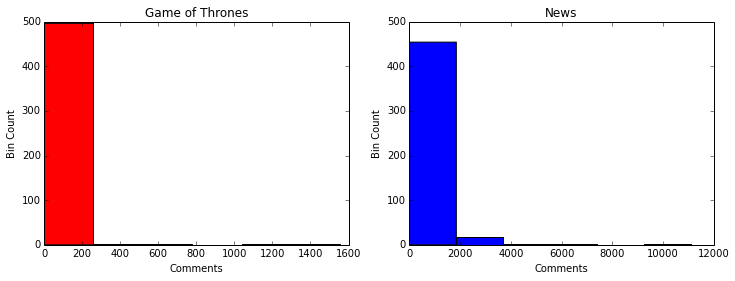

In [6]:
# make sure plots are in jupyter
%matplotlib inline 
from matplotlib import pyplot as plt # import pyplot
plt.figure(figsize=(12,4)) # set figure size
plt.subplot(1,2,1) # create subplot for GOT
plt.hist(x, bins=6, color="red") # create histogram
# Set axis labels and title
plt.xlabel("Comments")
plt.ylabel("Bin Count")
plt.title("Game of Thrones")
# create subplot for news
plt.subplot(1,2,2)
plt.hist(x_news, bins=6, color="blue")
plt.xlabel("Comments")
plt.ylabel("Bin Count")
plt.title("News")
# Display plots
plt.show()

What do these distributions say about how people comment on Reddit?
These histograms tell us that overall, an overwhelming amount of posts have between 0 and 1000 comments. However, there are various small peaks of comments much larger than 1000, so it is clear that a small number of posts stand out as very popular and are receiving about 8 times (News) and 3 times(Game of Thrones) the amount of posts as those in these major bins.

>**Ex. 2.3.5**: Create a $5 \times 5$ array `X` (a matrix) with random numbers and $5 \times 1$ array `a` (a tall vector) with 5 random numbers.
1. Compute the matrix-vector dot product between these two. Use `numpy`'s `dot` method. 
2. What happens if you just use `*` instead of `np.dot`? Explain.

In [7]:
import numpy as np
## Create arrays
rand_matrix = np.random.randn(5,5)
rand_vector = np.random.randn(5,1)
# Dot product
rand_dot    = np.dot(rand_matrix, rand_vector)
# Simple Multiplication
rand_mult   = rand_matrix * rand_vector
# Print results
print "Numpy Dot:"
print rand_dot
print "\nSimple Multiplication:"
print rand_mult

Numpy Dot:
[[-5.50641561]
 [ 0.88708234]
 [ 2.04092638]
 [-2.76455709]
 [-2.12959806]]

Simple Multiplication:
[[-7.27966710e-04 -2.62310308e-04  2.26519452e-02 -1.07083693e-02
   2.87058912e-02]
 [-7.71010689e-02 -1.69967878e-01 -8.62189613e-02 -1.53183894e-01
   6.68161495e-02]
 [-1.29027409e+00 -9.20888833e-01  1.41153251e-01 -2.11815856e+00
   7.45377697e-01]
 [-1.88612939e+00 -1.14112964e+00  1.32394831e+00  2.76165402e-01
   1.55681710e+00]
 [ 5.56607174e-01 -6.96273695e-01 -1.03398260e+00  1.76446610e-02
  -2.37809637e-01]]


Using just the * multiplies each column in the matrix by its element wise complement in the vector. np.dot multiplies the rows in the matrix by the columns in the vector and sums them up creating a 5 x 1 vector.

>**Ex. 2.4.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

In [8]:
# Initialize variable
a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]
# Compute mean
mean = np.mean(a)
print "Mean: " + str(mean)
# Compute median
median = np.median(a)
print "Median: " + str(median)

Mean: 1002.3333333333334
Median: 3.0


2.) The median is defined as the number that is located at the 50th quantile of the data, meaning that 50% of the data values are below the median.

3.) Taking the median of list a is more suitable than taking the mean in this case because there is an outlier in the list. The number 9000 causes the mean to be inflated and the median to give a more accurate representation of the spread of the list.

### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

In [11]:
conth = "0" # used to continue making requests and keep track of where you left off
contv = "0" # used to continue making requests and keep track of where you left off
# Instantiate lists
heroes = list()
villains = list()
# Loop through each hero and get the data for the heroes
while True:
    # Set up URL
    urlh = "https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_superheroes&cmlimit=500&prop=revisions&rvprop=content&cmcontinue="+ conth
    datah = rq.get(urlh).json() # Make request
    heroes.extend(datah['query']['categorymembers']) # add results to list
    try:
        conth = datah['continue']['cmcontinue'] # get the point where it left off
    except:
        break # break if its gotten everything
# Do the same for villains        
while True:
    urlv = "https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains&cmlimit=500&prop=revisions&rvprop=content&cmcontinue="+ contv
    datav = rq.get(urlv).json()
    villains.extend(datav['query']['categorymembers'])
    try:
        contv = datav['continue']['cmcontinue']
    except:
        break
# Get the heroes and villains and ambiguous's names from the data
heroes = [x['title'] for x in heroes]
villains = [x['title'] for x in villains]
ambiguous = set(heroes).intersection(set(villains)) # members in both heroes and villains
# Print results
print "Heroes: " + str(len(heroes))
print "Villains: " +str(len(villains))
print "Both heroes and villains: " + str(len(ambiguous))
# Print and compute jaccard similarity
print "Jacquard Similarity: " + str(float(len(set(heroes).intersection(set(villains))))/float(len(set(heroes).union(set(villains)))))

Heroes: 978
Villains: 1302
Both heroes and villains: 173
Jacquard Similarity: 0.0821072615093


>**Ex. 3.2.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `normed=True`. Other distribution plots are fine too, though.*

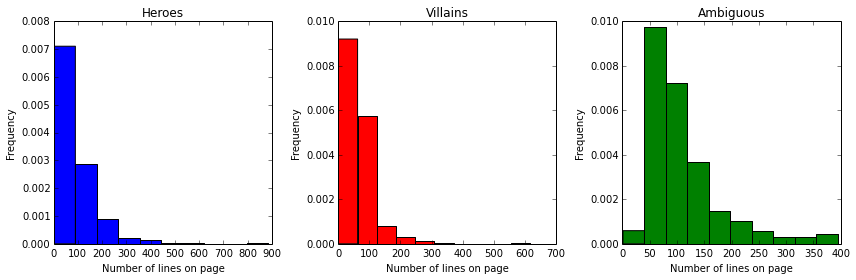

In [12]:
import os # in order to loop through directories
# Init dictionaries key: title value: length of page
hero_length = dict()
vill_length = dict()
ambi_length = dict()
# loop through the directory
# heroes
for file_name in os.listdir("../data/heroes"):
    with open("../data/heroes/" + file_name) as f:
        lines = 0
        for line in f: lines += 1
    hero_length[file_name] = lines
# villains
for file_name in os.listdir("../data/villains"):
    with open("../data/villains/" + file_name) as f:
        lines = 0
        for line in f: lines += 1
    vill_length[file_name] = lines
# ambiguous
for file_name in os.listdir("../data/ambiguous"):
    with open("../data/ambiguous/" + file_name) as f:
        lines = 0
        for line in f: lines += 1
    ambi_length[file_name] = lines
    
# Convert dicts to lists
hero_vals = hero_length.values()
vill_vals = vill_length.values()
ambi_vals = ambi_length.values()
# plots
plt.figure(figsize=(12,4)) # set figure size
# create subplot for Heroes
plt.subplot(1,3,1) 
plt.hist(hero_vals, normed=True) # create hist
# Set axis labels and title
plt.xlabel("Number of lines on page")
plt.ylabel("Frequency")
plt.title("Heroes")
# create subplot for villains
plt.subplot(1,3,2) 
plt.hist(vill_vals, normed=True, color="red") # create hist
# Set axis labels and title
plt.xlabel("Number of lines on page")
plt.ylabel("Frequency")
plt.title("Villains")
# create subplot for ambiguous
plt.subplot(1,3,3) 
plt.hist(ambi_vals, normed=True, color="green") # create hist
# Set axis labels and title
plt.xlabel("Number of lines on page")
plt.ylabel("Frequency")
plt.title("Ambiguous")
plt.tight_layout()
#plt.show()

It seems like the graphs are skewed right. It seems like the majority of characters have smaller wikipedia pages. There are a couple heroes that stand out as the most popular with over 1000 more lines than the most in Ambiguous or Villains. We thought this made sense because people admire clearcut heroes more than villains or ambiguous characters.

>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

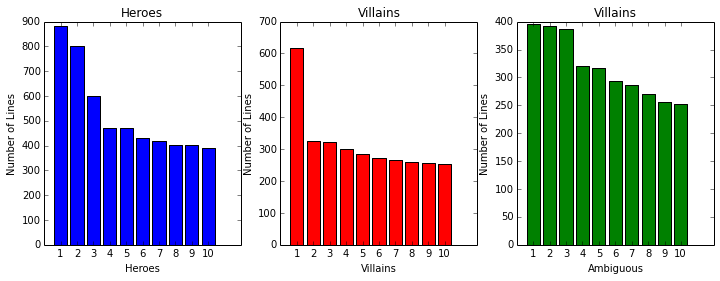

Hero legend
1: Jean Grey.txt
2: Wolverine (character).txt
3: Black Panther (comics).txt
4: Moon Knight.txt
5: Spider-Man.txt
6: Cable (comics).txt
7: She-Hulk.txt
8: X-23.txt
9: Deadpool.txt
10: Cyclops (Marvel Comics).txt

Villain legend
1: Dormammu.txt
2: Doctor Octopus.txt
3: Hood (comics).txt
4: Loki (comics).txt
5: Red Skull.txt
6: Mandarin (comics).txt
7: Norman Osborn.txt
8: Vulture (Marvel Comics).txt
9: Carnage (comics).txt
10: Galactus.txt

Ambiguous legend
1: Namor.txt
2: Eddie Brock.txt
3: Rogue (comics).txt
4: Emma Frost.txt
5: Sabretooth (comics).txt
6: Phoenix Force (comics).txt
7: Mystique (comics).txt
8: Magneto (comics).txt
9: Crimson Dynamo.txt
10: Legion (Marvel Comics).txt


In [71]:
# Get titles of top line characters
h = sorted(hero_length, key=hero_length.get, reverse=True)[0:10]
v = sorted(vill_length, key=vill_length.get, reverse=True)[0:10]
a = sorted(ambi_length, key=ambi_length.get, reverse=True)[0:10]
# Get lists of heights
h_heights = [hero_length[x] for x in h]
v_heights = [vill_length[x] for x in v]
a_heights = [ambi_length[x] for x in a]
# Make bars
plt.figure(figsize=(12,4)) # set figure size
# Heroes
plt.subplot(1,3,1) 
plt.xlabel("Heroes")
plt.ylabel("Number of Lines")
plt.title("Heroes")
plt.bar(range(1, len(h) + 1), h_heights,width=0.8, align="center")
plt.xticks(range(1, len(h) + 1))
# Villains
plt.subplot(1,3,2) 
plt.xlabel("Villains")
plt.ylabel("Number of Lines")
plt.title("Villains")
plt.bar(range(1, len(v) + 1), v_heights,width=0.8, align="center", color="red")
plt.xticks(range(1, len(v) + 1))
# Villains
plt.subplot(1,3,3) 
plt.xlabel("Ambiguous")
plt.ylabel("Number of Lines")
plt.title("Villains")
plt.bar(range(1, len(a) + 1), a_heights,width=0.8, align="center", color="green")
plt.xticks(range(1, len(a) + 1))
plt.show()
# Legends because they couldnt fit on the graphs
print "Hero legend"
for i,hero in enumerate(h): print str(i+1) + ": " + hero
print "\nVillain legend"
for i,vill in enumerate(v): print str(i+1) + ": " + vill
print "\nAmbiguous legend"
for i,ambi in enumerate(a): print str(i+1) + ": " + ambi

Some unexpected heroes, villains, and ambiguous characters page lengths are the long

>**Ex. 3.2.3**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* For each class, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*

### Week 4

*If you had trouble boulding a team alliance matrix, use mine. You can load it as a pandas.DataFrame, with pd.read_csv('data_team_alliances.csv', index_col=0). The rightmost column is the target array.*

> **Ex. 4.2.1**: Train a classifier on all of your data and test its accuracy.

>* If your team alliance matrix is `X_ta` and your target array is `y_ta` you can do this by instantiating a model like:
>
        from sklearn.naive_bayes import BernoulliNB
        model = BernoulliNB()
        model.fit(X_ta, y_ta)  # <--- This is the training/fitting/learning step
        
> The `BernoulliNB` is a version of the Naive Bayes classifier which associates certain features with labels and asks what the probability of a label for a data point is given its features. You are free to use any other classifier if you want. Popular ones are trees, random forests, support vector machines, feed forward neural networks, logistic regression, and the list goes on. With `sklearn`, they are just as easy to employ as the `BernoulliNB` classifier.


>1. Test the accuracy of your model. You can use the `.predict` method on the `model` object to get predictions for a matrix of data points. Report the accuracy of your model on the same data that you trained the model on, alongside the baseline accuracy of a "dumb" model that only guesses for the majority class.

>2. Report the precision, recall and F1 scores, with respect to the minority class (heroes). `sklearn` has implementations that you can use if you are short for time. Extra credit for doing it using only basic linear algebra operations with `numpy`, though.

> **Ex. 4.3.2**: Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. It's important that you comment on the result.

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.